In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import hdbscan
from sklearn.manifold import TSNE

### 데이터 살펴보기
- tag_prior_0720
- nlp_df: 자연어처리를 통해 클러스터링한 label데이터

In [2]:
path = "../../datas/"
algo_df = pd.read_csv(path+"tag_prior_0720.csv")
algo_df = algo_df.loc[:,~algo_df.columns.str.match("Unnamed")]
nlp_df = pd.read_csv(path+"camp_description.csv")[['facltNm', 'labels']]
len(algo_df), len(nlp_df)

(2611, 1410)

In [3]:
algo_df.head()

camp  contentId  friendly_s  exciting_s  relax_s  spacious_s  clean_s  \
0    좋은 카라반       7934           0           0        0           0        0   
1  성주선바위캠핑장       7935           0           0        0           0        0   
2   이화만리캠핑장       7936           0           0        0           0        0   
3   하비오토캠핑장       7939           0           0        0           0        0   
4     수림 휴원       7940           0           0        0           0        0   

   hot_water_s  parking_s  with_child_s  ...    view_r  parking_r  exciting_r  \
0            0          0             0  ...  0.000000        0.0         0.0   
1            0          0             0  ...  0.781176        0.0         0.0   
2            0          0             0  ...  0.000000        0.0         0.0   
3            0          0             0  ...  0.000000        0.0         0.0   
4            0          0             0  ...  0.000000        0.0         0.0   

    clean_r  conv_facility_r  comfort  together   fun  healing  clean  
0  0.000000              0.0     21.9       6.1   4.1      5.0    0.0  
1  0.797778              0.0     43.4      48.8  27.5     44.1   57.6  
2  0.000000              0.0     21.9       6.1   4.1      5.0    0.0  
3  0.000000              0.0     27.6      14.6   6.2     20.0    0.0  
4  0.000000              0.0     21.9       6.1   4.1      5.0    0.0  

[5 rows x 48 columns]

In [4]:
nlp_df.drop_duplicates('facltNm', keep=False, inplace=True)
nlp_df.head()

facltNm  labels
0     몽골캠핑장      14
1   고운마을캠핑장      -1
2     솔미캠핑장      10
3    강나루야영장      10
4  스카이랜드리조트      10

In [5]:
merge_df = pd.merge(algo_df, nlp_df, how="left", left_on="camp", right_on="facltNm")
merge_df.drop('facltNm', axis=1,inplace=True)
merge_df["labels"] = [str(int(r)) if np.isnan(r) == False else r for r in merge_df["labels"]]
merge_df = pd.get_dummies(merge_df, columns=['labels'], dummy_na=True)
merge_df.head()

camp  contentId  friendly_s  exciting_s  relax_s  spacious_s  clean_s  \
0    좋은 카라반       7934           0           0        0           0        0   
1  성주선바위캠핑장       7935           0           0        0           0        0   
2   이화만리캠핑장       7936           0           0        0           0        0   
3   하비오토캠핑장       7939           0           0        0           0        0   
4     수림 휴원       7940           0           0        0           0        0   

   hot_water_s  parking_s  with_child_s  ...  labels_15  labels_2  labels_3  \
0            0          0             0  ...          0         0         0   
1            0          0             0  ...          0         0         0   
2            0          0             0  ...          0         0         0   
3            0          0             0  ...          0         0         0   
4            0          0             0  ...          0         0         0   

   labels_4  labels_5  labels_6  labels_7  labels_8  labels_9  labels_nan  
0         0         0         0         0         0         0           1  
1         0         0         0         0         0         0           1  
2         0         0         0         0         0         0           1  
3         0         0         0         0         0         0           1  
4         0         0         0         0         0         0           1  

[5 rows x 66 columns]

In [6]:
# 중복값 확인했으나 수가 적거나 영향이 작다고 판단, 우선 군집 진행
merge_df[merge_df[['camp']].duplicated()==True].sort_values("camp")['camp'].unique()

array(['느티나무 캠핑장', '늘푸른캠핑장', '두리캠핑장', '둥지캠핑장', '백운계곡캠핑장', '별빛야영장',
       '별헤는 밤', '산여울캠핑장', '소풍캠핑장', '솔바람 캠핑장', '솔밭야영장', '솔밭캠핑장', '포시즌',
       '포시즌 캠핑장'], dtype=object)

### 클러스터링

In [7]:
import camp_clustering as cc
ccl = cc.CampCluster()

In [8]:
# df = ccl.preprocessing()
# tsne_df = ccl.tsne_dm_reduction()

Cluster labels: 6 개
original data length: 2611 / clustering data length: 2611
cluster
0    265
1    910
2    601
3    207
4    395
5    233
Name: contentId, dtype: int64
Condensed tree plot


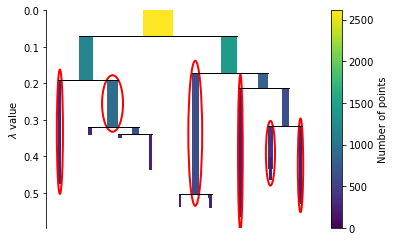

camp  contentId  friendly_s  exciting_s  relax_s  spacious_s  clean_s  \
0    좋은 카라반       7934           0           0        0           0        0   
1  성주선바위캠핑장       7935           0           0        0           0        0   
2   이화만리캠핑장       7936           0           0        0           0        0   
3   하비오토캠핑장       7939           0           0        0           0        0   
4     수림 휴원       7940           0           0        0           0        0   

   hot_water_s  parking_s  with_child_s  ...   clean_r  conv_facility_r  \
0            0          0             0  ...  0.000000              0.0   
1            0          0             0  ...  0.797778              0.0   
2            0          0             0  ...  0.000000              0.0   
3            0          0             0  ...  0.000000              0.0   
4            0          0             0  ...  0.000000              0.0   

   comfort  together   fun  healing  clean  cluster          x          y  
0     21.9       6.1   4.1      5.0    0.0        0  43.636429   0.108624  
1     43.4      48.8  27.5     44.1   57.6        4 -29.690331 -10.794867  
2     21.9       6.1   4.1      5.0    0.0        0  50.893574  -0.078206  
3     27.6      14.6   6.2     20.0    0.0        1 -12.296199  47.778065  
4     21.9       6.1   4.1      5.0    0.0        0  48.364128   0.206465  

[5 rows x 51 columns]

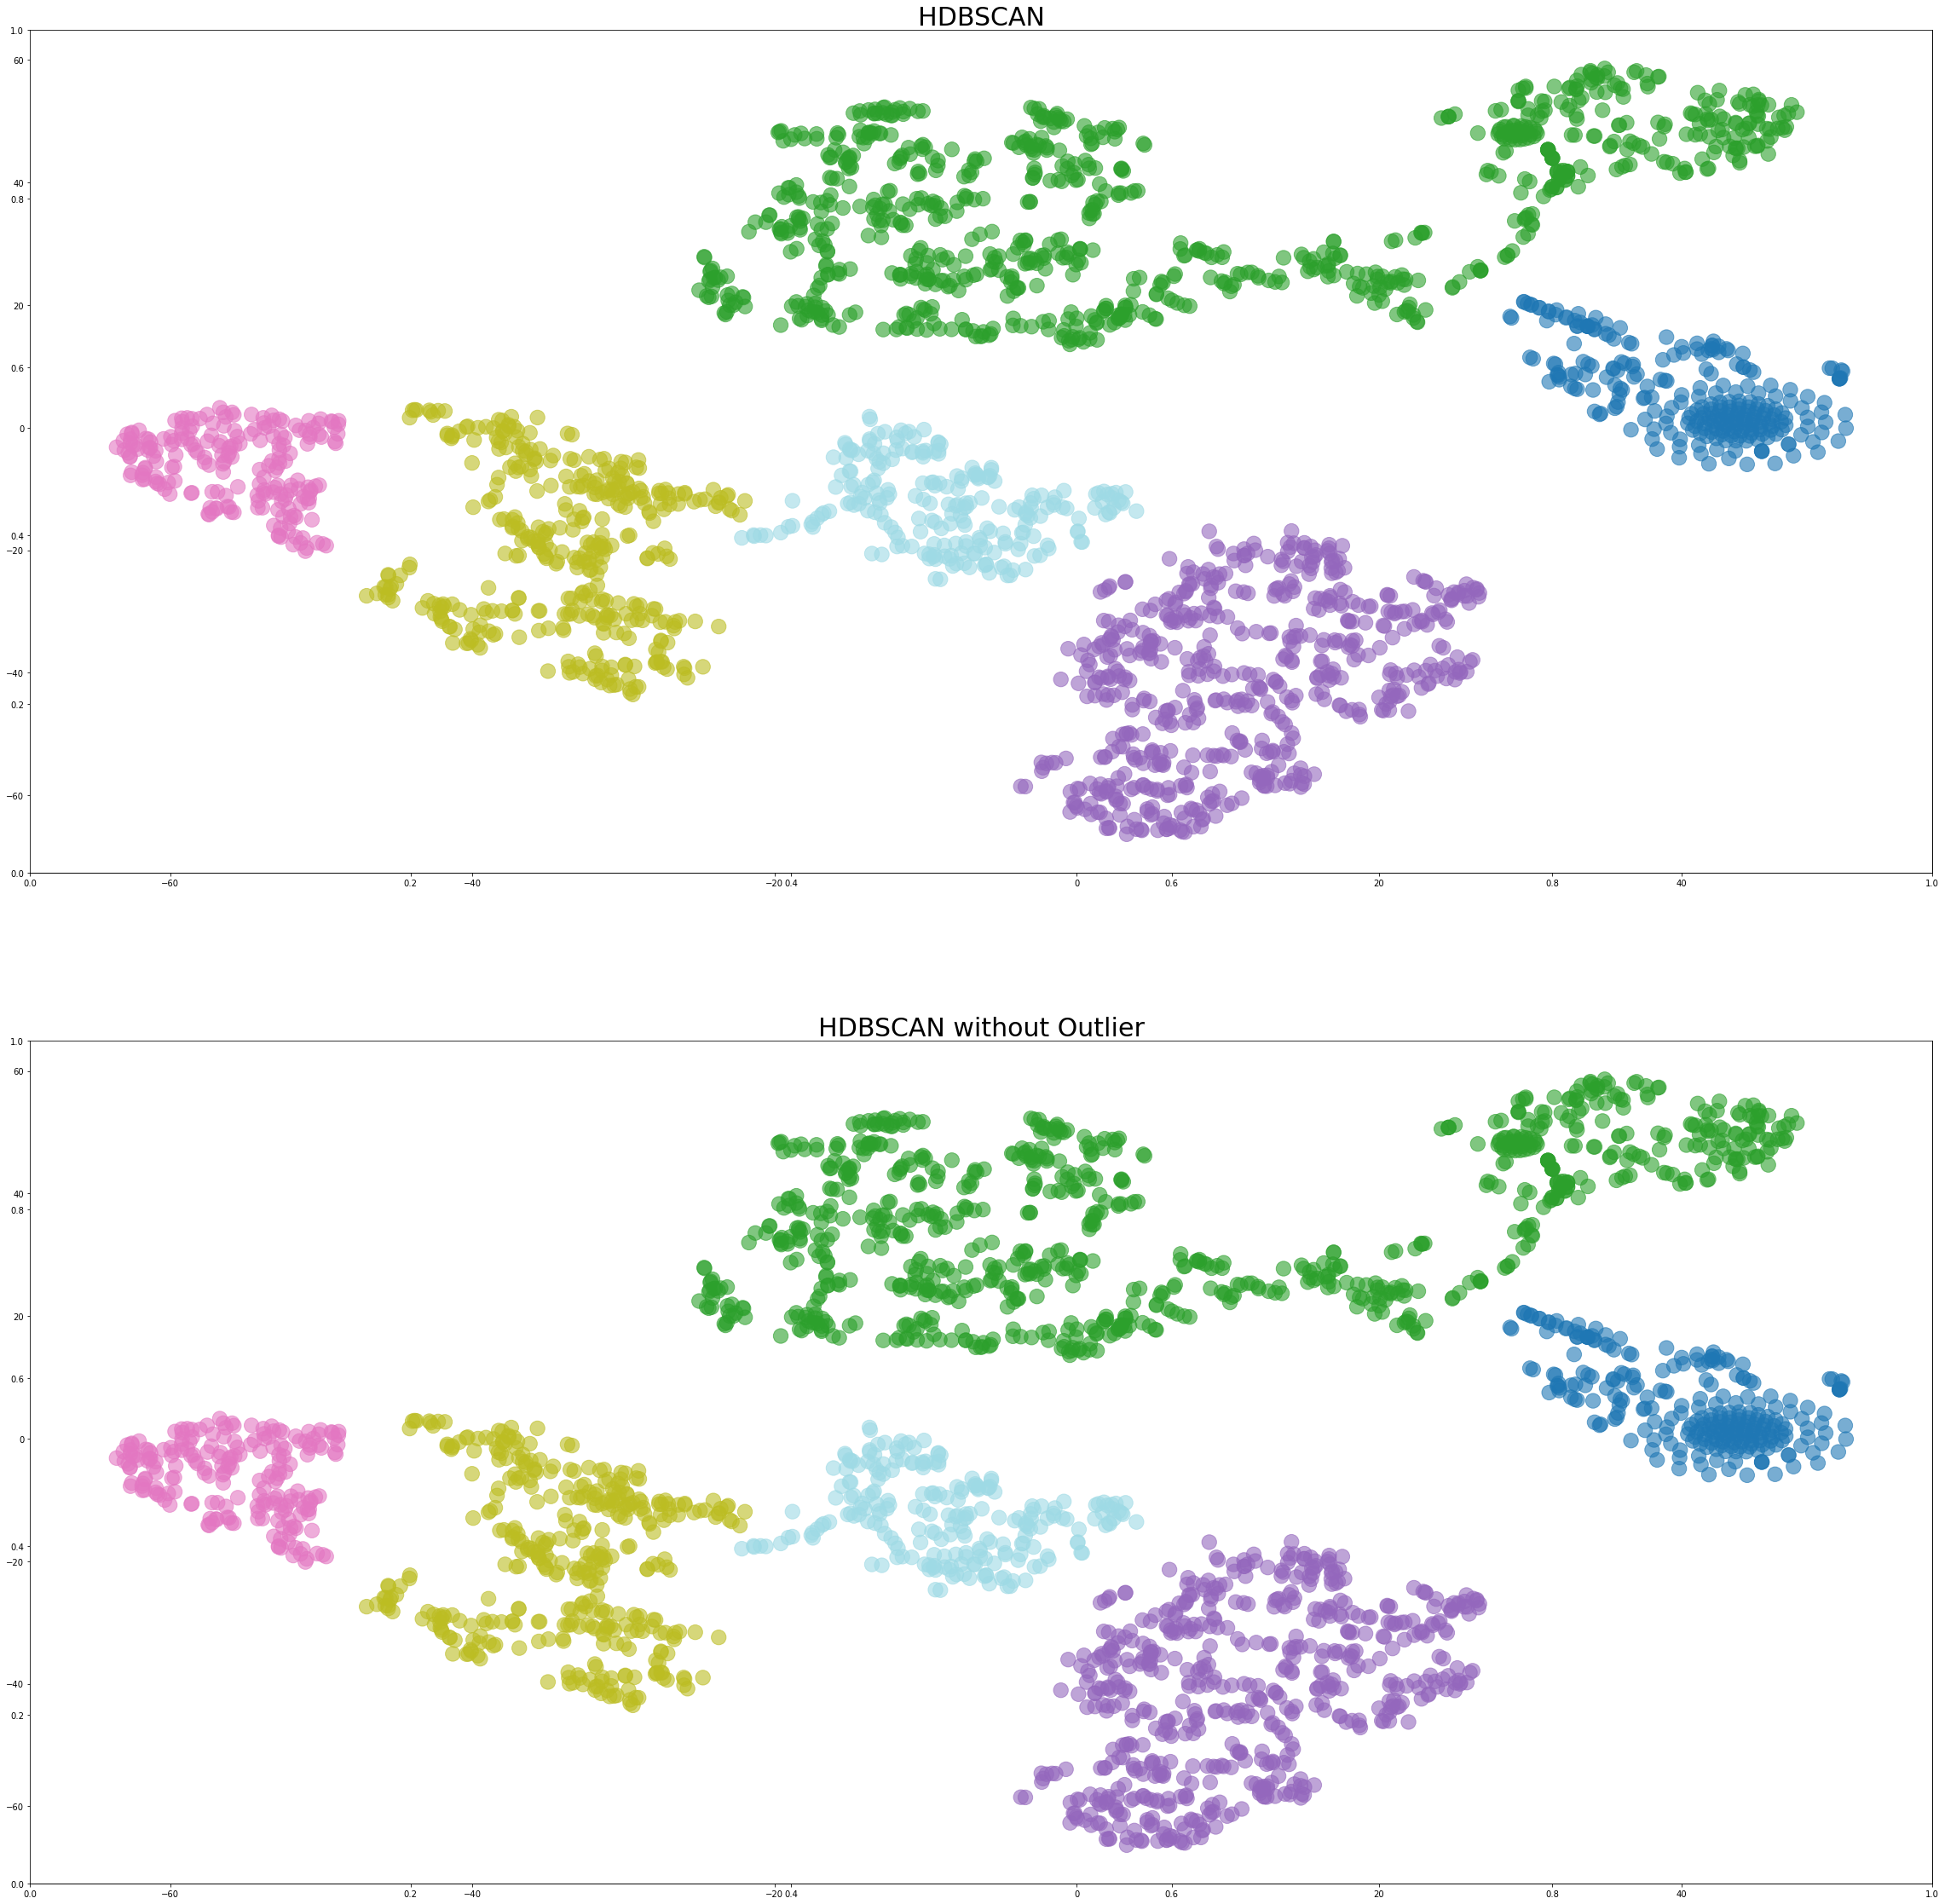

In [9]:
df = ccl.hdbscan_clustering(min_cluster_size=200, tsne=True)
df.head()

Dataframe Describe
         comfort   together        fun    healing      clean          x
count   5.000000   5.000000   5.000000   5.000000   5.000000    5.00000
mean   36.712641  41.007643  27.135804  32.693444  39.640394  469.20000
std     9.368256  18.869966  10.854045  18.737630  31.642015  292.28445
min    26.409890  18.785385  12.516923  11.185165   0.210330  207.00000
25%    27.723794  24.115807  23.059068  22.099667  28.085691  233.00000
50%    39.076395  48.679241  25.711899  31.748927  28.821888  395.00000
75%    42.415443  49.947639  32.924464  37.329114  58.505316  601.00000
max    47.937681  63.510145  41.466667  61.104348  82.578744  910.00000


comfort   together        fun    healing      clean    x
cluster                                                            
0        22.155094   6.127925   4.106792   5.013208   0.000000  265
1        26.409890  18.785385  12.516923  11.185165   0.210330  910
2        27.723794  24.115807  23.059068  22.099667  28.085691  601
3        47.937681  63.510145  41.466667  61.104348  82.578744  207
4        42.415443  48.679241  25.711899  37.329114  58.505316  395
5        39.076395  49.947639  32.924464  31.748927  28.821888  233

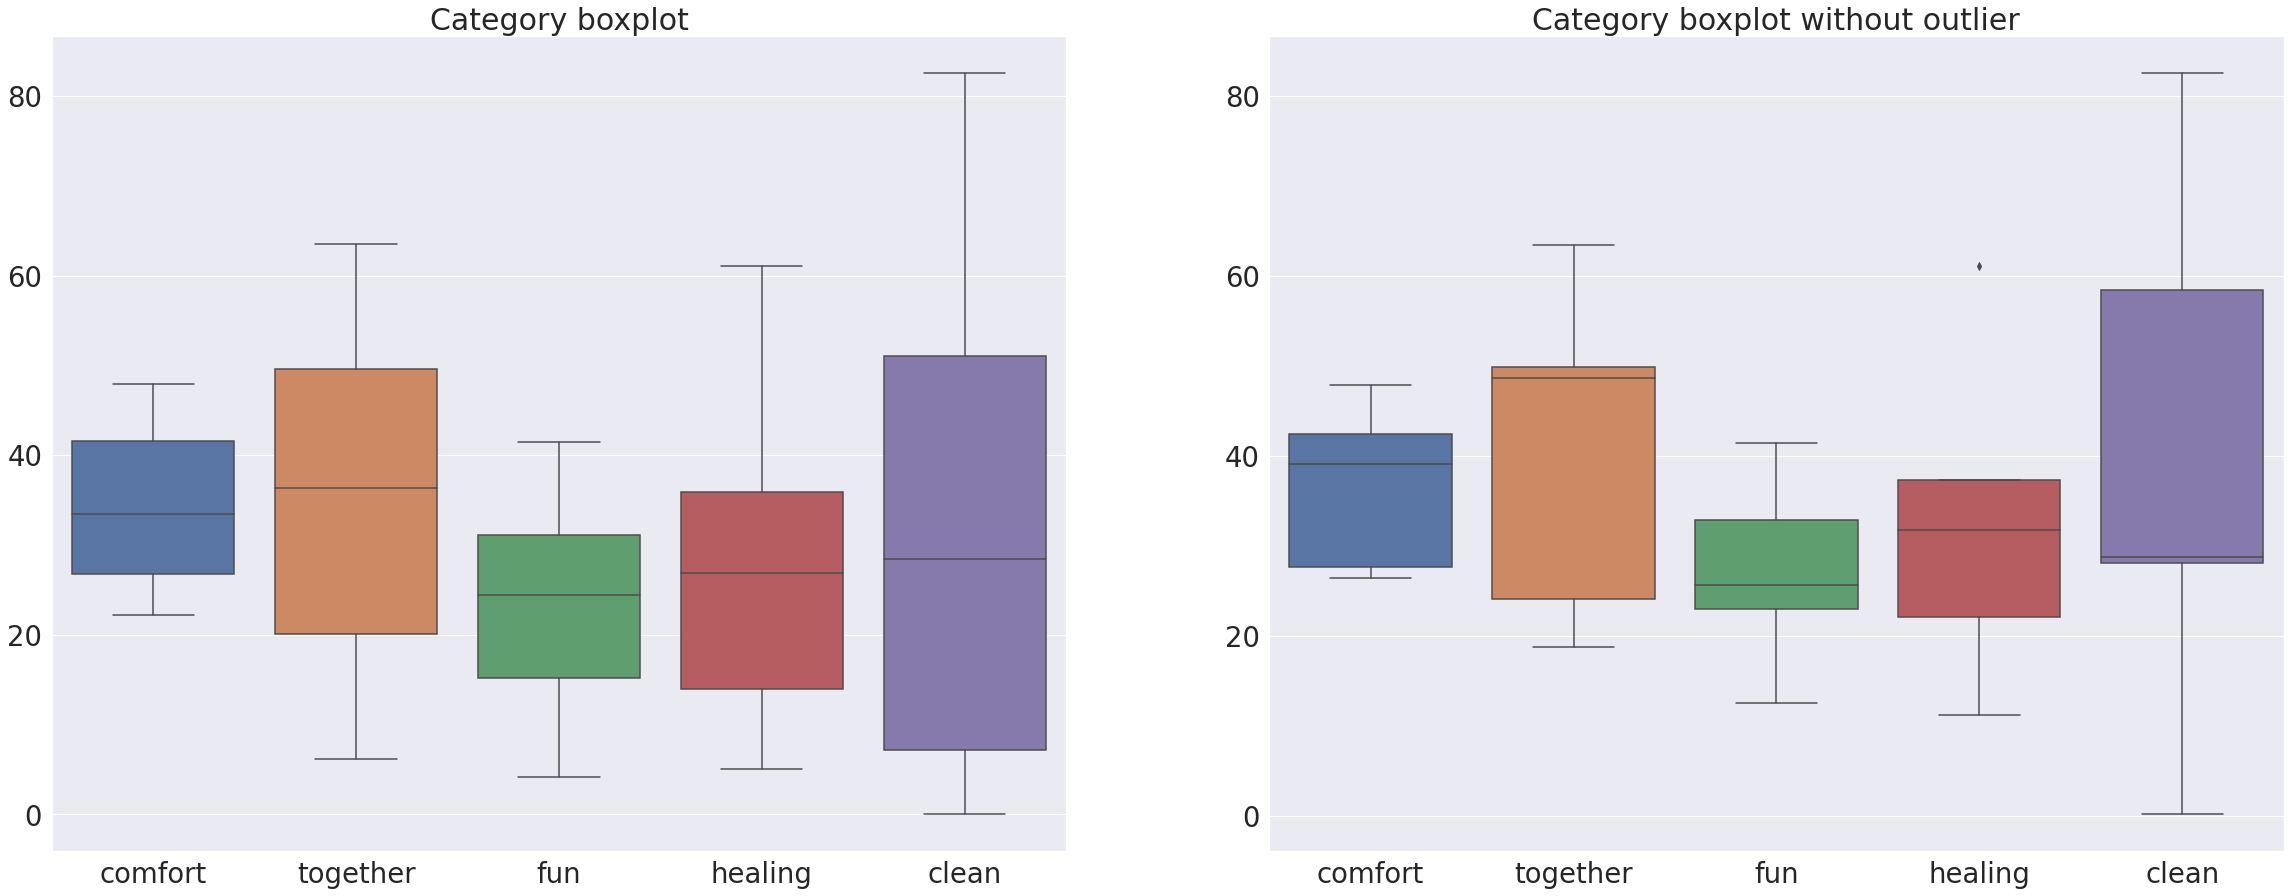

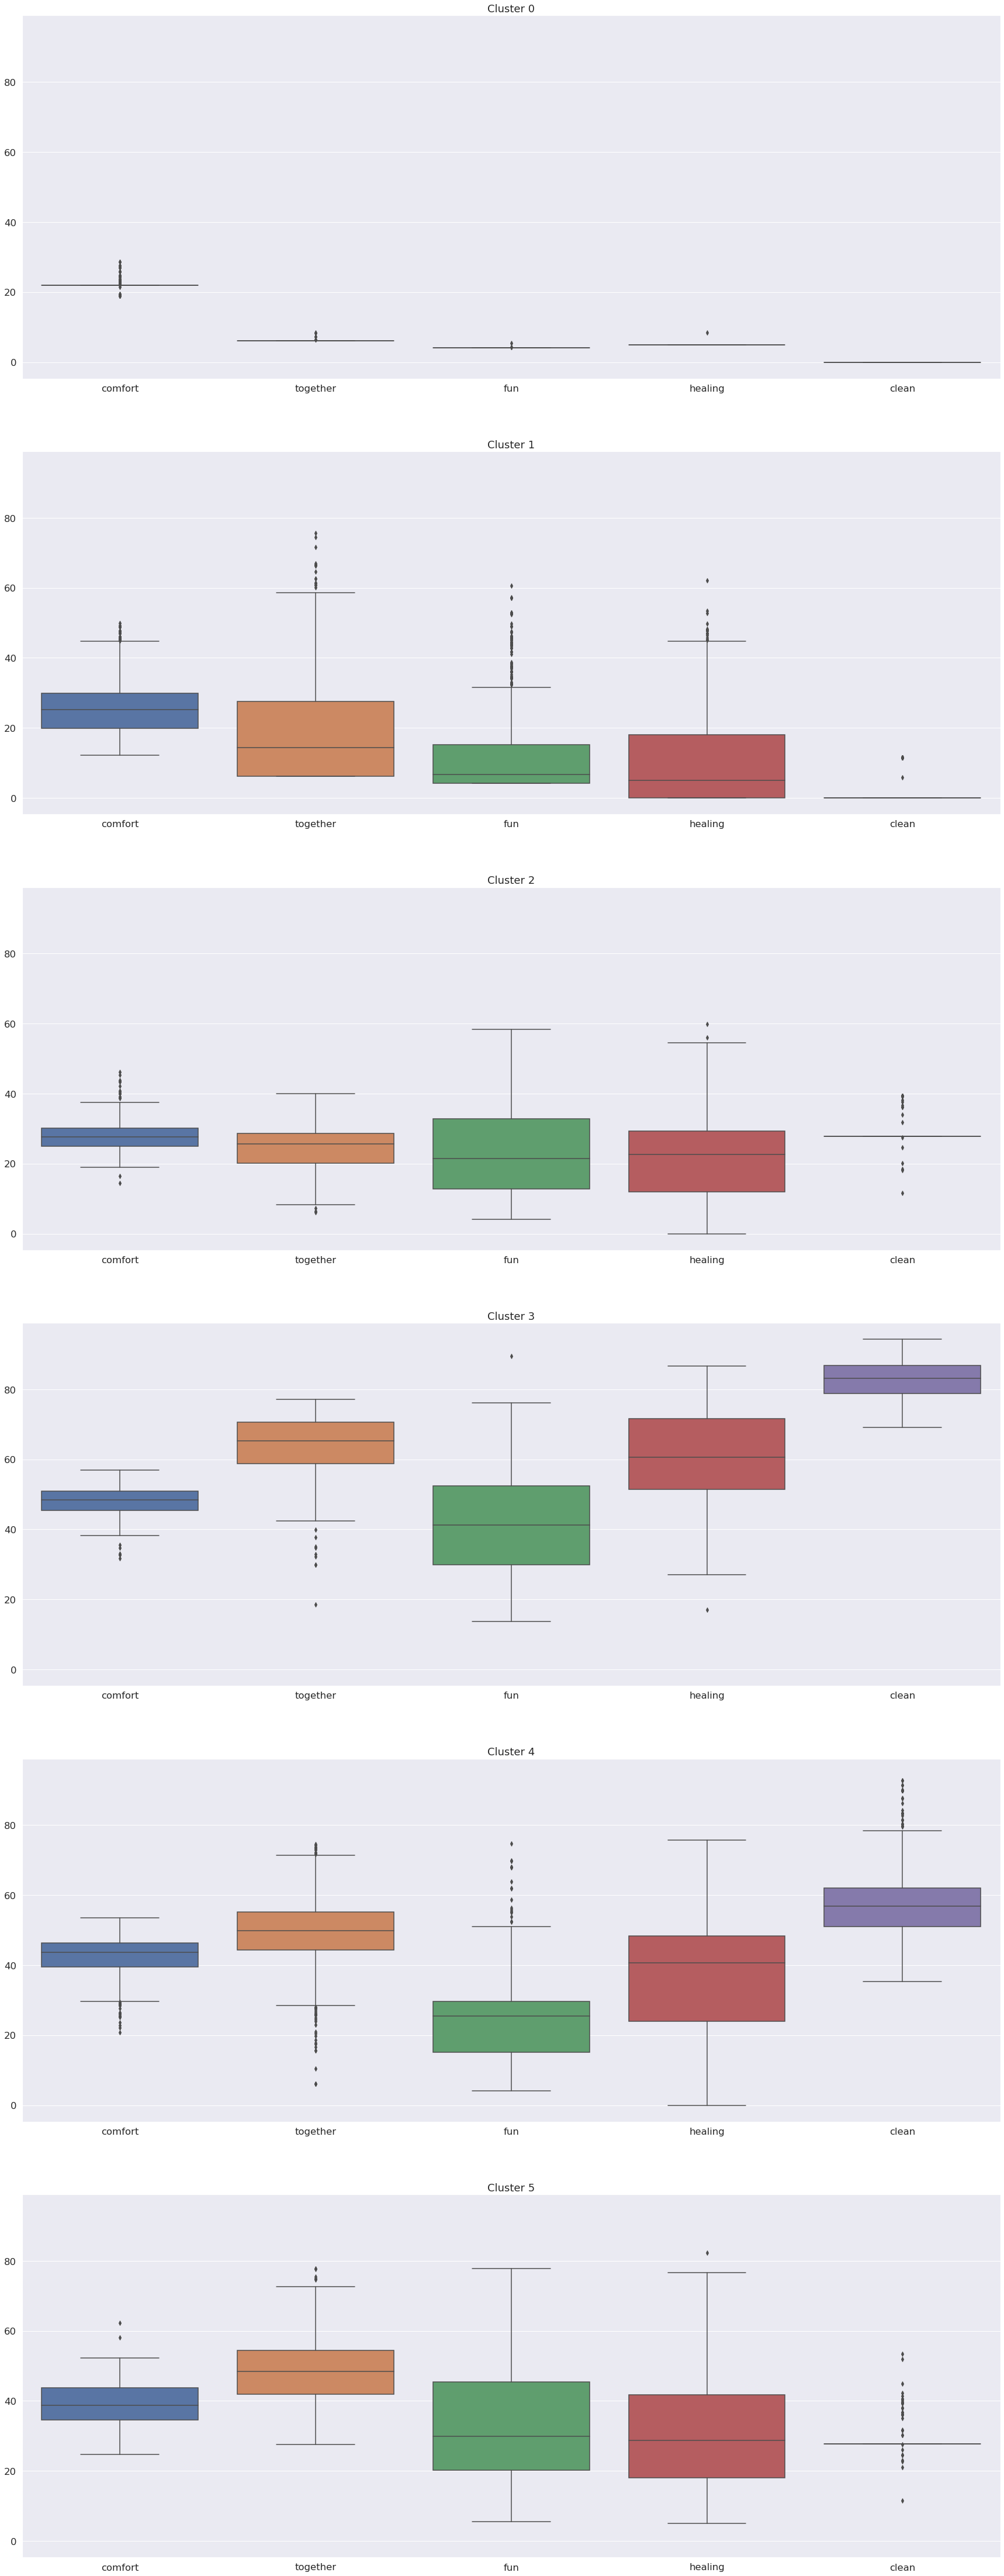

In [10]:
pv = ccl.cluster_eda(df)
pv

In [11]:
# 리포트 export
# ccl.export_result(df)

## Round 2

### min_cluster_size=100 정도는 해줘야 cluster 개수가 10 미만이 된다

Cluster labels: 7 개
original data length: 2611 / clustering data length: 2611
cluster
-1      9
 0    263
 1    912
 2    601
 3    207
 4    231
 5    388
Name: contentId, dtype: int64
Condensed tree plot


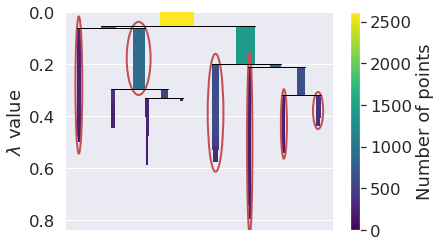

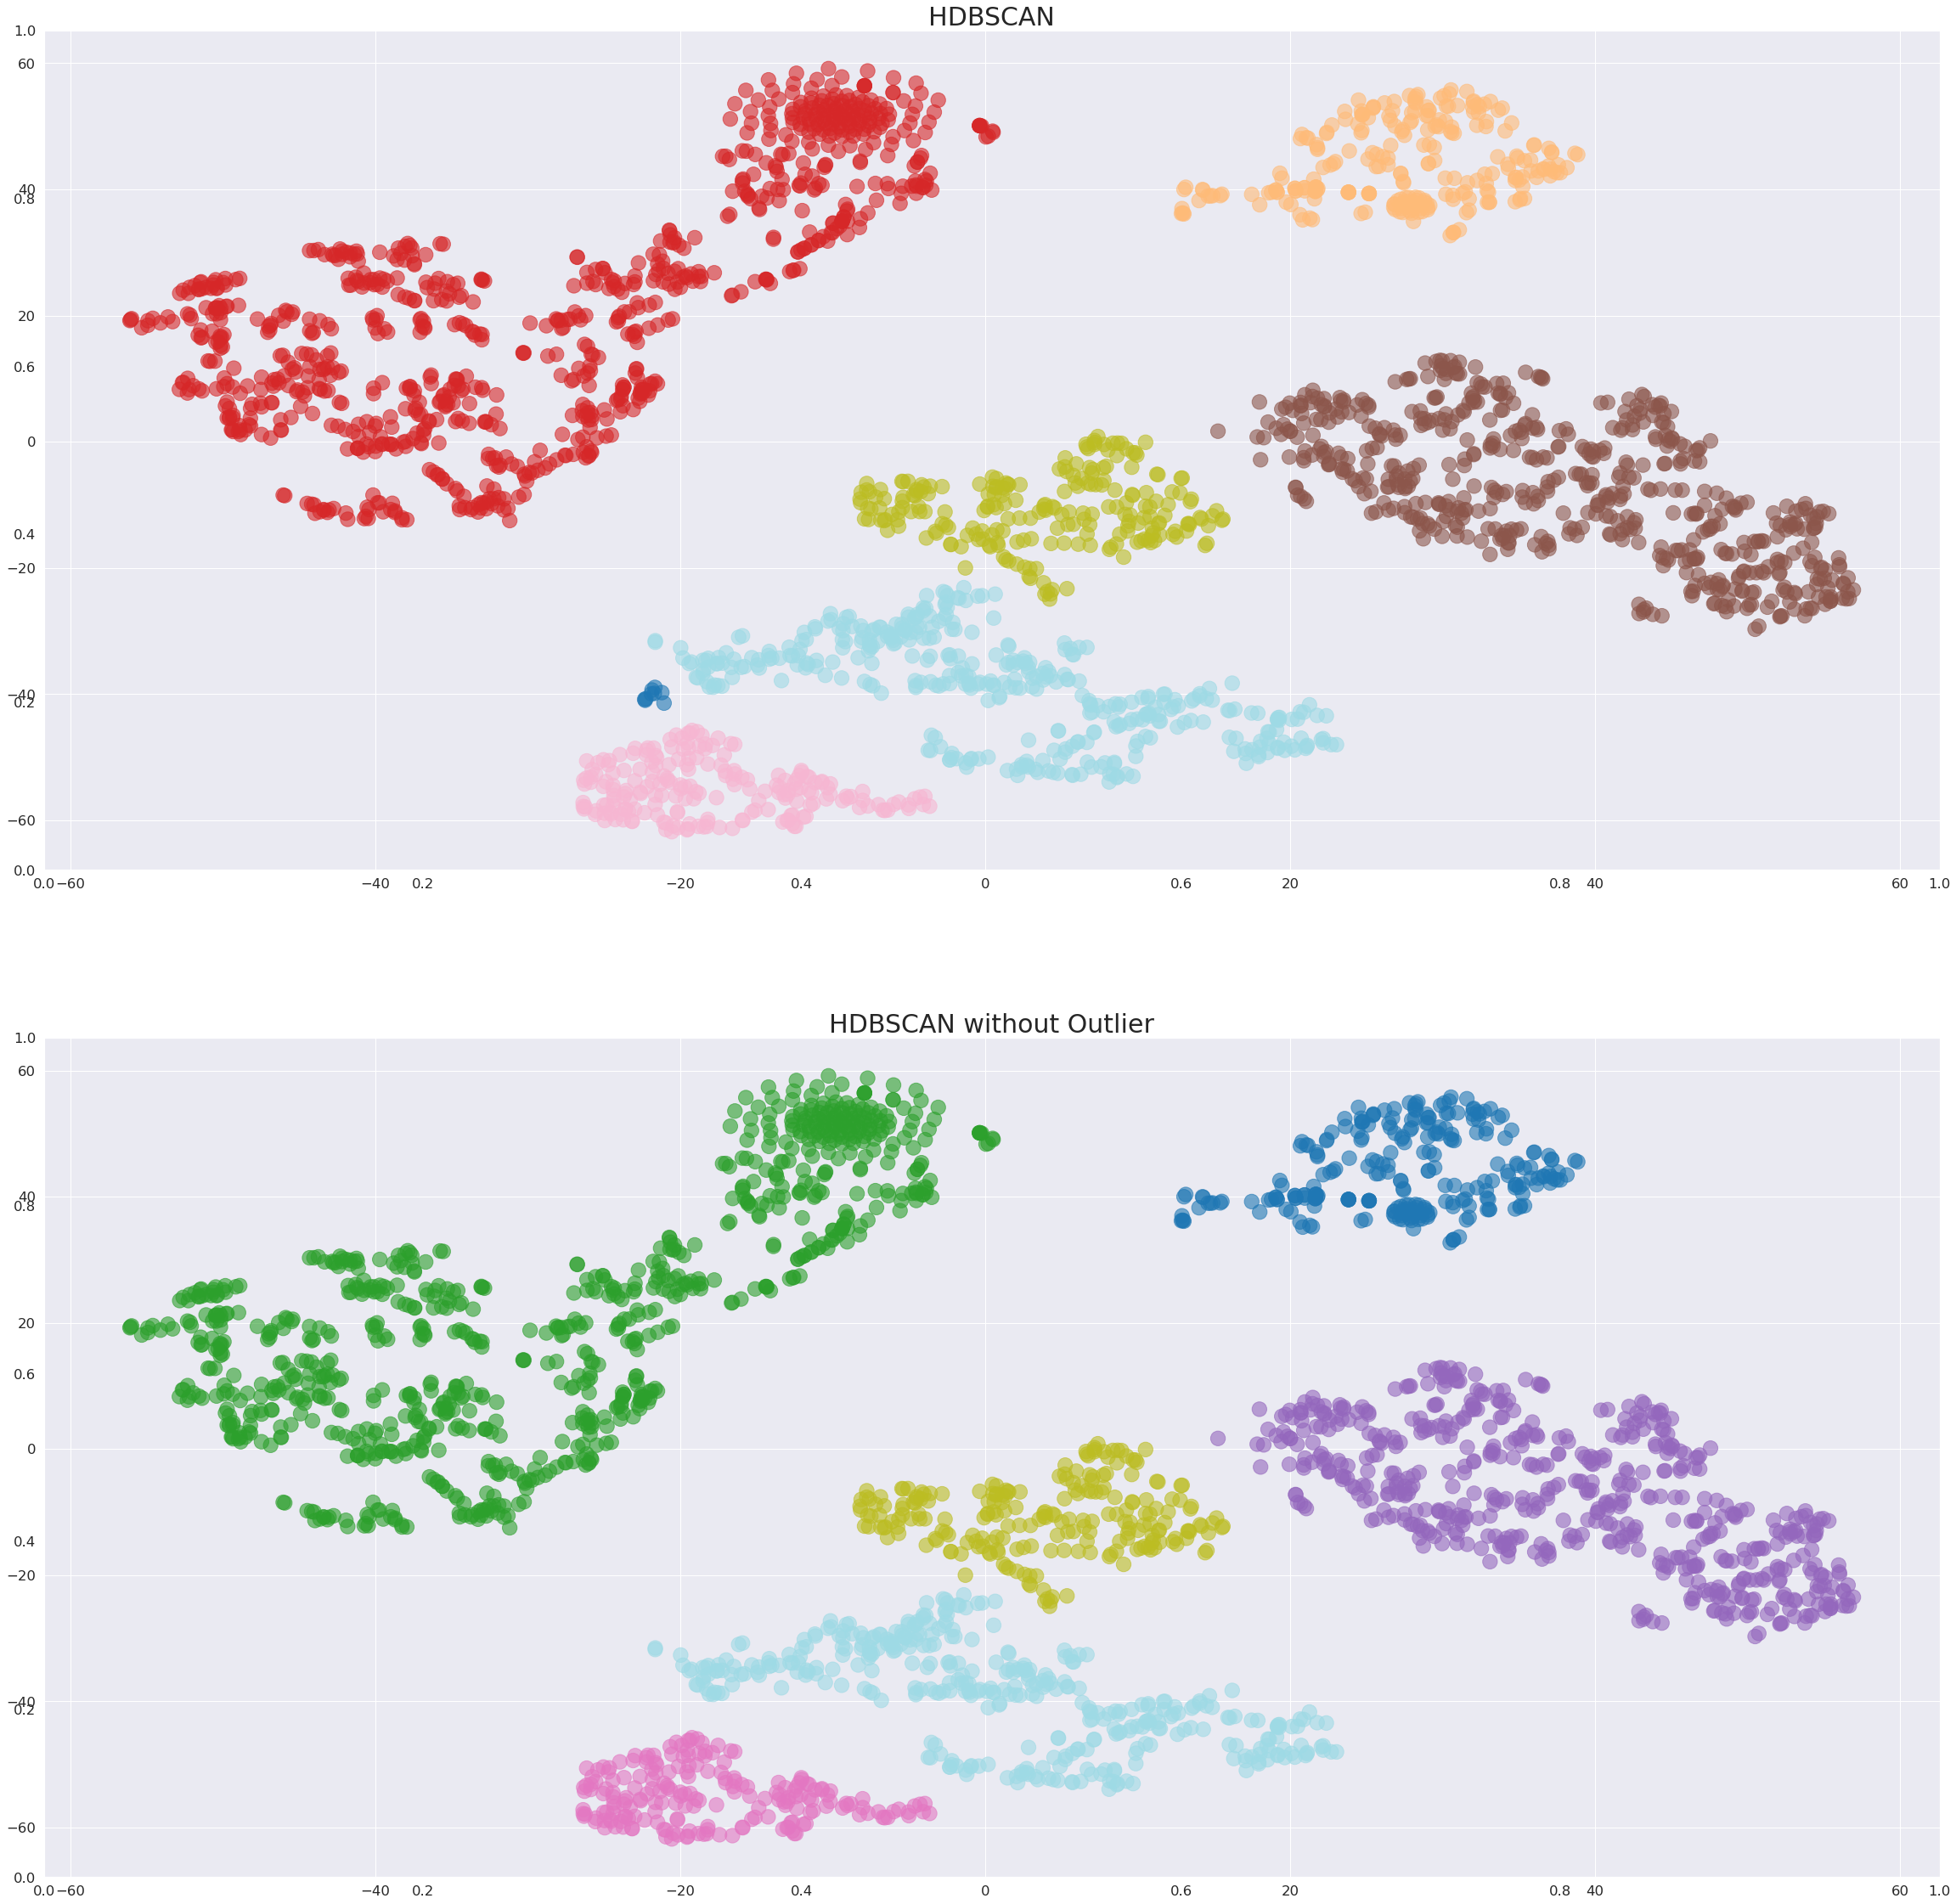

In [12]:
df2 = ccl.hdbscan_clustering(min_cluster_size=150, tsne=True)

### cluster 간의 편차 탐색

Dataframe Describe
         comfort   together        fun    healing      clean           x
count   6.000000   6.000000   6.000000   6.000000   6.000000    6.000000
mean   33.930628  35.121480  23.125436  27.402047  32.988320  433.666667
std    10.799452  22.006271  13.438473  21.166928  32.597050  275.850443
min    19.513688   6.223954   4.149810   0.000000   0.000000  207.000000
25%    27.302659  20.076402  15.129323  14.987910   7.178824  239.000000
50%    33.368823  36.205584  24.023735  26.986414  28.350421  325.500000
75%    41.427819  49.464100  30.699049  35.506628  50.984136  547.750000
max    47.937681  63.510145  41.466667  61.104348  82.578744  912.000000


comfort   together        fun    healing      clean    x
cluster                                                            
-1       51.166667  67.922222  66.766667  59.255556  60.011111    9
 0       19.513688   6.223954   4.149810   0.000000   0.000000  263
 1       27.162281  18.729934  12.486075  12.617325   0.209868  912
 2       27.723794  24.115807  23.059068  22.099667  28.085691  601
 3       47.937681  63.510145  41.466667  61.104348  82.578744  207
 4       39.013853  49.853680  32.602597  31.873160  28.615152  231
 5       42.232474  48.295361  24.988402  36.717784  58.440464  388

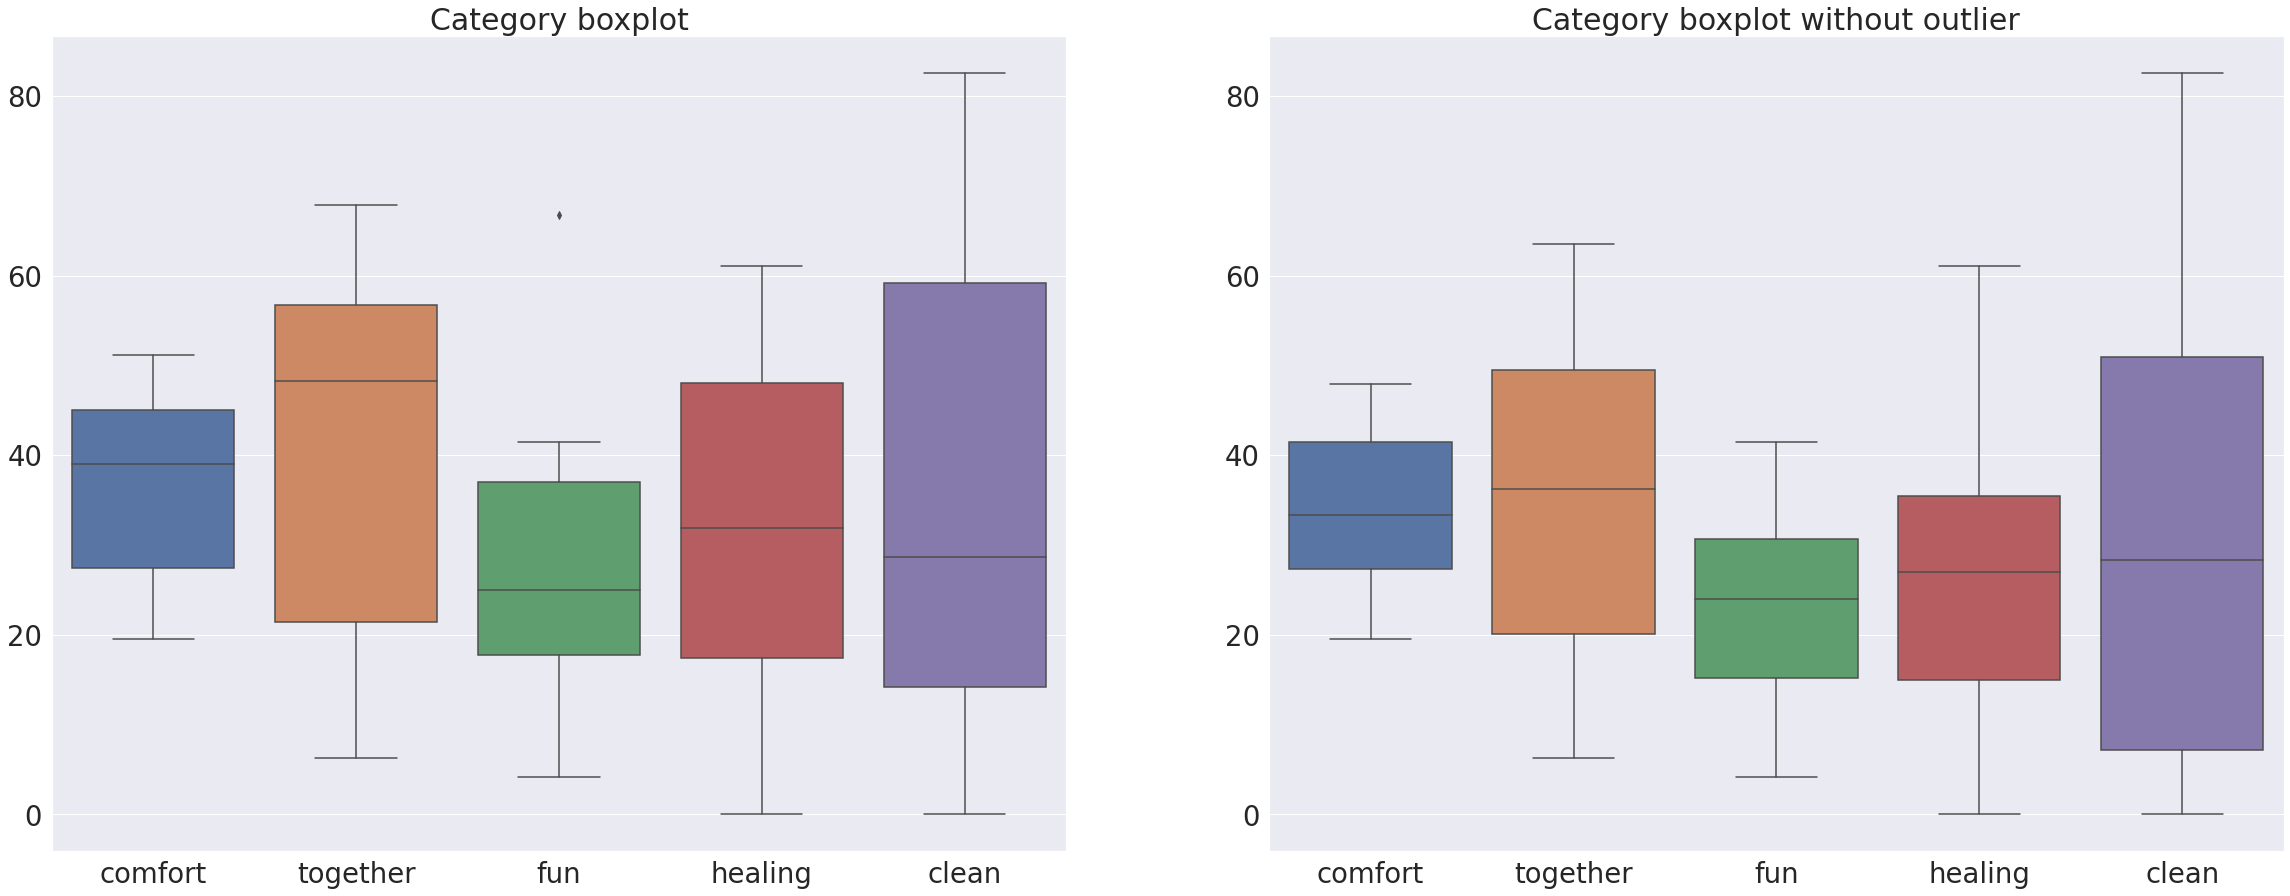

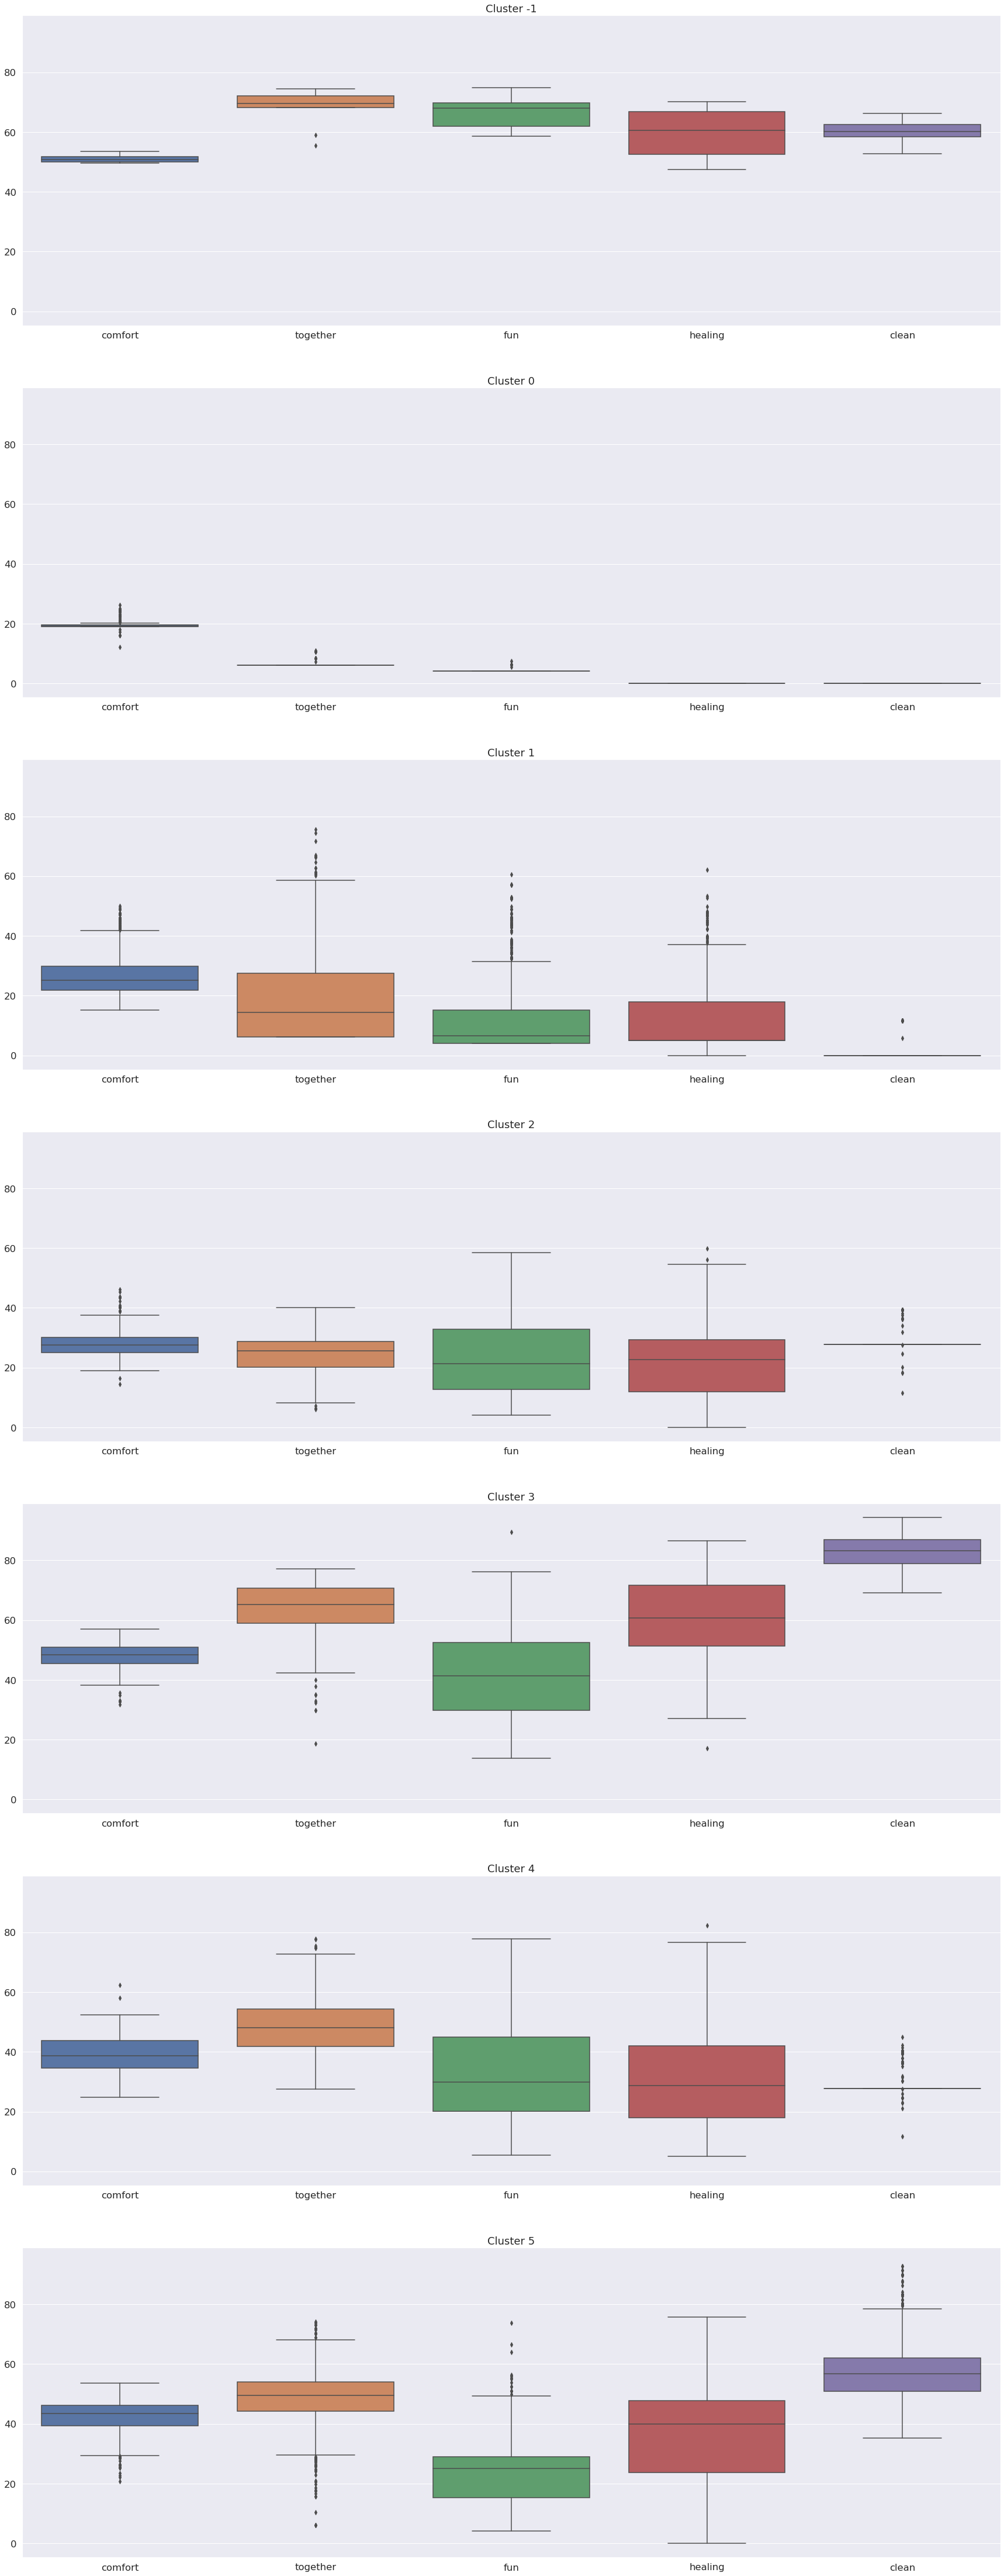

In [13]:
pv2 = ccl.cluster_eda(df2)
pv2

In [14]:
# ccl.export_result(df2)

In [15]:
import tag_points as tp
tag = tp.TagPoints()

In [50]:
# tag_df = pd.read_csv(path+"top7_tags_0720_14:43:29.csv")
tag_df = pd.read_csv(path+"top5_tags_0720.csv")
tag_df

Unnamed: 0  index                                          top5_tags
0              0   7934                                                 []
1              1   7935           ['수영장 있는', '시설이 좋은', '친절한', '깨끗한', '힐링']
2              2   7936                                                 []
3              3   7939                            ['힐링', '시설이 좋은', '친절한']
4              4   7940                                                 []
...          ...    ...                                                ...
2606        2606   3290              ['계곡 옆', '그늘이 많은', '물맑은', '힐링', '가족']
2607        2607   3291                 ['온수 잘 나오는', '계곡 옆', '힐링', '재미있는']
2608        2608   3434  ['사이트 간격이 넓은', '차 대기 편한', '가족', '자전거 타기 좋은', '...
2609        2609   3436  ['가족', '아이들 놀기 좋은', '사이트 간격이 넓은', '계곡 옆', '그늘이...
2610        2610   3440  ['계곡 옆', '물맑은', '별보기 좋은', '사이트 간격이 넓은', '온수 잘 ...

[2611 rows x 3 columns]

In [65]:
tag_cs_df = df2[['contentId','camp', 'cluster', 'comfort', 'together', 'fun', 'healing', 'clean']].copy()
tag_cs_df['tags'] = tag_df['top5_tags']
replace_ls = [" ", "[", "]", "'"]
for r_ele in replace_ls:
    tag_cs_df['tags'] = [r.replace(r_ele, "") for r in tag_cs_df['tags']]
tag_cs_df['tags'] = [r.replace(",", " / ") for r in tag_cs_df['tags']]
# tag_cs_df['tags'] = [r.split(",") for r in tag_cs_df['tags']]
tag_cs_df

contentId          camp  cluster  comfort  together   fun  healing  \
0          7934        좋은 카라반        1     21.9       6.1   4.1      5.0   
1          7935      성주선바위캠핑장        5     43.4      48.8  27.5     44.1   
2          7936       이화만리캠핑장        1     21.9       6.1   4.1      5.0   
3          7939       하비오토캠핑장        1     27.6      14.6   6.2     20.0   
4          7940         수림 휴원        1     21.9       6.1   4.1      5.0   
...         ...           ...      ...      ...       ...   ...      ...   
2606       3290    폭포가 있는 캠핑장        4     41.4      37.5  14.0     57.3   
2607       3291   폭포골자연휴양림야영장        1     27.4       9.8   6.6     23.4   
2608       3434  함평나비마을 서울캠핑장        2     30.2      18.2  13.6      5.0   
2609       3436       함허동천야영장        1     32.1      66.5  16.7     21.8   
2610       3440  합천 아마존 오토캠핑장        2     24.6      14.1  20.2     27.0   

      clean                                    tags  
0       0.0                                          
1      57.6          수영장있는 / 시설이좋은 / 친절한 / 깨끗한 / 힐링  
2       0.0                                          
3       0.0                        힐링 / 시설이좋은 / 친절한  
4       0.0                                          
...     ...                                     ...  
2606   40.5             계곡옆 / 그늘이많은 / 물맑은 / 힐링 / 가족  
2607    0.0                온수잘나오는 / 계곡옆 / 힐링 / 재미있는  
2608   27.8  사이트간격이넓은 / 차대기편한 / 가족 / 자전거타기좋은 / 여유있는  
2609    0.0   가족 / 아이들놀기좋은 / 사이트간격이넓은 / 계곡옆 / 그늘이많은  
2610   27.8   계곡옆 / 물맑은 / 별보기좋은 / 사이트간격이넓은 / 온수잘나오는  

[2611 rows x 9 columns]

In [71]:
c = 5
t_df = tag_cs_df[tag_cs_df['cluster']==c]
words_bag = ''
for tags in t_df['tags']:
    words_bag += (' / '+tags)
print(words_bag)
wc = WordCloud(font_path='font/NanumGothic.ttf', background_color='white').generate(words_bag)
print(wc.words_)

 / 수영장있는 / 시설이좋은 / 친절한 / 깨끗한 / 힐링 / 접근성좋은 / 친절한 / 힐링 / 깨끗한 / 뷰가좋은 / 먹거리가풍부한 / 뷰가좋은 / 힐링 / 수영장있는 / 접근성좋은 / 먹거리가풍부한 / 친절한 / 힐링 / 깨끗한 / 뷰가좋은 / 둘레길 / 문화유적 / 축제 / 생태교육 / 재미있는 / 뷰가좋은 / 친절한 / 깨끗한 / 힐링 / 접근성좋은 / 수영장있는 / 힐링 / 친절한 / 깨끗한 / 시설이좋은 / 뷰가좋은 / 힐링 / 친절한 / 깨끗한 / 시설이좋은 / 먹거리가풍부한 / 친절한 / 힐링 / 접근성좋은 / 시설이좋은 / 먹거리가풍부한 / 힐링 / 수영장있는 / 시설이좋은 / 깨끗한 / 깨끗한 / 시설이좋은 / 친절한 / 친절한 / 수영장있는 / 시설이좋은 / 접근성좋은 / 깨끗한 / 수영장있는 / 친절한 / 뷰가좋은 / 힐링 / 접근성좋은 / 아이들놀기좋은 / 힐링 / 먹거리가풍부한 / 접근성좋은 / 친절한 / 시설이좋은 / 친절한 / 깨끗한 / 뷰가좋은 / 힐링 / 먹거리가풍부한 / 깨끗한 / 친절한 / 시설이좋은 / 힐링 / 깨끗한 / 뷰가좋은 / 힐링 / 접근성좋은 / 시설이좋은 / 뷰가좋은 / 깨끗한 / 시설이좋은 / 힐링 / 접근성좋은 / 깨끗한 / 힐링 / 수영장있는 / 시설이좋은 / 친절한 / 깨끗한 / 시설이좋은 / 친절한 / 뷰가좋은 / 힐링 / 접근성좋은 / 깨끗한 / 친절한 / 깨끗한 / 시설이좋은 / 친절한 / 뷰가좋은 / 힐링 / 접근성좋은 / 친절한 / 깨끗한 / 깨끗한 / 힐링 / 수영장있는 / 깨끗한 / 접근성좋은 / 힐링 / 시설이좋은 / 친절한 / 시설이좋은 / 힐링 / 친절한 / 깨끗한 / 친절한 / 힐링 / 시설이좋은 / 깨끗한 / 뷰가좋은 / 힐링 / 친절한 / 깨끗한 / 뷰가좋은 / 시설이좋은 / 깨끗한 / 시설이좋은 / 친절한 / 힐링 / 수영장있는 / 깨끗한 / 뷰가좋은 / 시설이좋은 / 친절한 / 접근성좋은 / 깨끗한 / 먹거리가풍부한 / 뷰가좋은 / 힐링 / 시설이좋은 / 먹거리가풍부한 / 친

{'친절한': 1.0, '시설이좋은': 0.7380952380952381, '가족 아이들놀기좋은': 0.6666666666666666, '힐링': 0.6349206349206349, '접근성좋은': 0.48412698412698413, '아이들놀기좋은 커플': 0.4523809523809524, '깨끗한': 0.4365079365079365, '가족': 0.3968253968253968, '계곡옆': 0.38095238095238093, '수영장있는': 0.3492063492063492, '가족 커플': 0.3333333333333333, '뷰가좋은': 0.3253968253968254, '물놀이하기좋은': 0.24603174603174602, '사이트간격이넓은': 0.23809523809523808, '친절한 깨끗한': 0.20634920634920634, '먹거리가풍부한': 0.1984126984126984, '문화유적': 0.1984126984126984, '사이트간격이넓은 온수잘나오는': 0.19047619047619047, '여유있는 힐링': 0.18253968253968253, '여유있는': 0.1746031746031746, '바다가보이는': 0.1746031746031746, '뷰가좋은 힐링': 0.16666666666666666, '별보기좋은 여유있는': 0.16666666666666666, '차대기편한': 0.15079365079365079, '둘레길': 0.14285714285714285, '온수잘나오는 차대기편한': 0.1349206349206349, '물맑은': 0.12698412698412698, '생태교육': 0.11904761904761904, '재미있는': 0.11904761904761904, '계곡옆 그늘이많은': 0.11904761904761904, '온수잘나오는': 0.09523809523809523, '그늘이많은 별보기좋은': 0.09523809523809523, '별보기좋은': 0.07142857142857142, '그늘

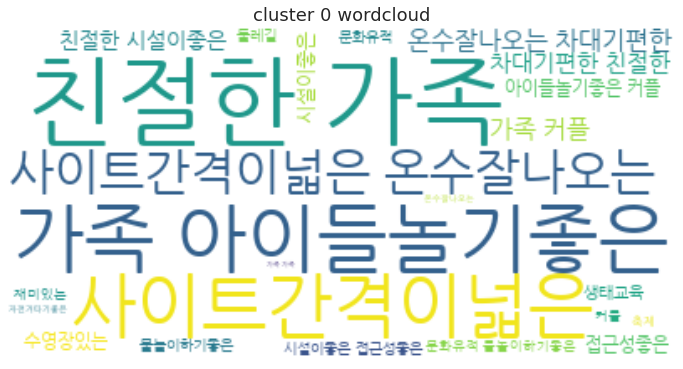

{'친절한 가족': 1.0, '가족 아이들놀기좋은': 0.8775510204081632, '사이트간격이넓은': 0.7551020408163265, '사이트간격이넓은 온수잘나오는': 0.7346938775510204, '온수잘나오는 차대기편한': 0.7142857142857143, '가족 커플': 0.6938775510204082, '차대기편한 친절한': 0.5918367346938775, '친절한 시설이좋은': 0.5510204081632653, '시설이좋은': 0.4489795918367347, '수영장있는': 0.3877551020408163, '아이들놀기좋은 커플': 0.3877551020408163, '접근성좋은': 0.3673469387755102, '생태교육': 0.32653061224489793, '시설이좋은 접근성좋은': 0.2857142857142857, '문화유적': 0.2653061224489796, '물놀이하기좋은': 0.24489795918367346, '둘레길': 0.22448979591836735, '커플': 0.1836734693877551, '문화유적 물놀이하기좋은': 0.1836734693877551, '재미있는': 0.16326530612244897, '축제': 0.12244897959183673, '온수잘나오는': 0.061224489795918366, '자전거타기좋은': 0.061224489795918366, '가족 가족': 0.04081632653061224, '차대기편한': 0.02040816326530612, '친절한': 0.02040816326530612}


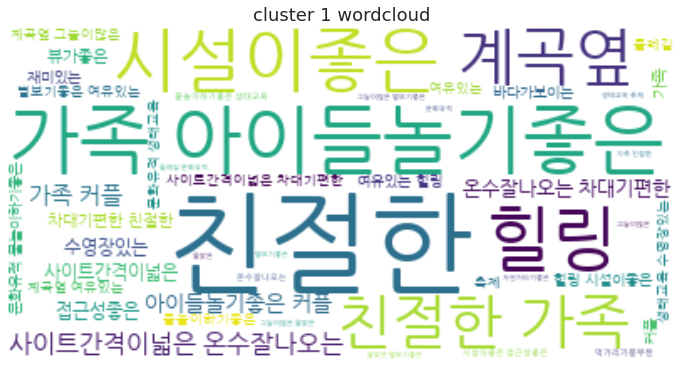

{'친절한': 1.0, '가족 아이들놀기좋은': 0.7692307692307693, '힐링': 0.6602564102564102, '시설이좋은': 0.6538461538461539, '계곡옆': 0.532051282051282, '친절한 가족': 0.48717948717948717, '사이트간격이넓은 온수잘나오는': 0.48717948717948717, '가족 커플': 0.4423076923076923, '아이들놀기좋은 커플': 0.41025641025641024, '온수잘나오는 차대기편한': 0.41025641025641024, '수영장있는': 0.33974358974358976, '사이트간격이넓은': 0.33974358974358976, '접근성좋은': 0.3269230769230769, '차대기편한 친절한': 0.28205128205128205, '뷰가좋은': 0.27564102564102566, '가족': 0.27564102564102566, '재미있는': 0.22435897435897437, '커플': 0.21153846153846154, '문화유적 물놀이하기좋은': 0.20512820512820512, '힐링 시설이좋은': 0.1987179487179487, '여유있는 힐링': 0.1987179487179487, '바다가보이는': 0.19230769230769232, '별보기좋은 여유있는': 0.19230769230769232, '사이트간격이넓은 차대기편한': 0.19230769230769232, '여유있는': 0.17307692307692307, '계곡옆 그늘이많은': 0.16666666666666666, '계곡옆 여유있는': 0.16025641025641027, '물놀이하기좋은': 0.15384615384615385, '둘레길': 0.14743589743589744, '생태교육 수영장있는': 0.14743589743589744, '문화유적 생태교육': 0.14743589743589744, '축제': 0.14102564102564102, '시설이좋

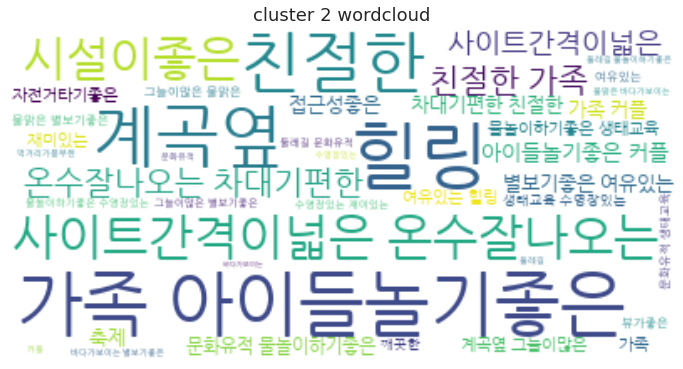

{'힐링': 1.0, '가족 아이들놀기좋은': 0.9108910891089109, '계곡옆': 0.8118811881188119, '친절한': 0.7524752475247525, '사이트간격이넓은 온수잘나오는': 0.7524752475247525, '시설이좋은': 0.7227722772277227, '온수잘나오는 차대기편한': 0.6435643564356436, '친절한 가족': 0.6237623762376238, '사이트간격이넓은': 0.6039603960396039, '아이들놀기좋은 커플': 0.594059405940594, '차대기편한 친절한': 0.48514851485148514, '별보기좋은 여유있는': 0.4752475247524752, '가족 커플': 0.4752475247524752, '접근성좋은': 0.46534653465346537, '축제': 0.43564356435643564, '문화유적 물놀이하기좋은': 0.40594059405940597, '여유있는 힐링': 0.39603960396039606, '가족': 0.38613861386138615, '재미있는': 0.37623762376237624, '자전거타기좋은': 0.3564356435643564, '계곡옆 그늘이많은': 0.3465346534653465, '물놀이하기좋은 생태교육': 0.3465346534653465, '생태교육 수영장있는': 0.33663366336633666, '깨끗한': 0.32673267326732675, '뷰가좋은': 0.27722772277227725, '그늘이많은 물맑은': 0.26732673267326734, '여유있는': 0.24752475247524752, '물맑은 별보기좋은': 0.24752475247524752, '문화유적 생태교육': 0.2376237623762376, '수영장있는 재미있는': 0.22772277227722773, '그늘이많은 별보기좋은': 0.21782178217821782, '둘레길 문화유적': 0.217821782178217

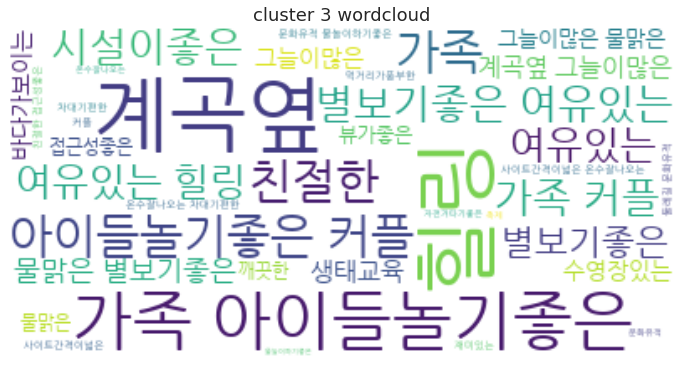

{'힐링': 1.0, '계곡옆': 0.9777777777777777, '가족 아이들놀기좋은': 0.9555555555555556, '아이들놀기좋은 커플': 0.7111111111111111, '가족': 0.6888888888888889, '친절한': 0.6666666666666666, '별보기좋은 여유있는': 0.6, '시설이좋은': 0.5777777777777777, '가족 커플': 0.5777777777777777, '여유있는 힐링': 0.5333333333333333, '여유있는': 0.5111111111111111, '별보기좋은': 0.4222222222222222, '물맑은 별보기좋은': 0.4, '계곡옆 그늘이많은': 0.35555555555555557, '생태교육': 0.3333333333333333, '바다가보이는': 0.28888888888888886, '그늘이많은': 0.28888888888888886, '수영장있는': 0.28888888888888886, '그늘이많은 물맑은': 0.28888888888888886, '뷰가좋은': 0.24444444444444444, '접근성좋은': 0.2222222222222222, '깨끗한': 0.2222222222222222, '물맑은': 0.2222222222222222, '사이트간격이넓은 온수잘나오는': 0.2222222222222222, '커플': 0.2, '재미있는': 0.2, '친절한 접근성좋은': 0.2, '차대기편한': 0.17777777777777778, '문화유적 물놀이하기좋은': 0.17777777777777778, '온수잘나오는 차대기편한': 0.15555555555555556, '사이트간격이넓은': 0.13333333333333333, '둘레길 문화유적': 0.13333333333333333, '먹거리가풍부한': 0.1111111111111111, '문화유적': 0.08888888888888889, '온수잘나오는': 0.08888888888888889, '자전거타기좋은': 0.088

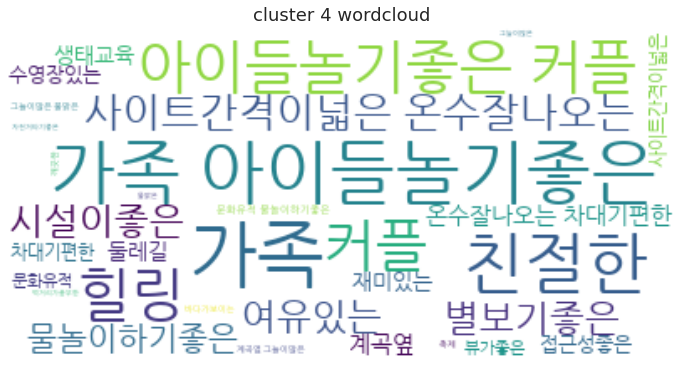

{'가족': 1.0, '가족 아이들놀기좋은': 0.92, '친절한': 0.84, '아이들놀기좋은 커플': 0.6133333333333333, '힐링': 0.6, '커플': 0.5733333333333334, '사이트간격이넓은 온수잘나오는': 0.44, '별보기좋은': 0.37333333333333335, '여유있는': 0.36, '시설이좋은': 0.3466666666666667, '물놀이하기좋은': 0.3466666666666667, '온수잘나오는 차대기편한': 0.3466666666666667, '계곡옆': 0.3333333333333333, '생태교육': 0.30666666666666664, '둘레길': 0.30666666666666664, '재미있는': 0.30666666666666664, '수영장있는': 0.28, '접근성좋은': 0.26666666666666666, '사이트간격이넓은': 0.24, '차대기편한': 0.24, '뷰가좋은': 0.2, '문화유적': 0.2, '문화유적 물놀이하기좋은': 0.18666666666666668, '깨끗한': 0.13333333333333333, '바다가보이는': 0.13333333333333333, '계곡옆 그늘이많은': 0.13333333333333333, '그늘이많은 물맑은': 0.13333333333333333, '축제': 0.12, '자전거타기좋은': 0.09333333333333334, '물맑은': 0.09333333333333334, '그늘이많은': 0.08, '먹거리가풍부한': 0.06666666666666667}


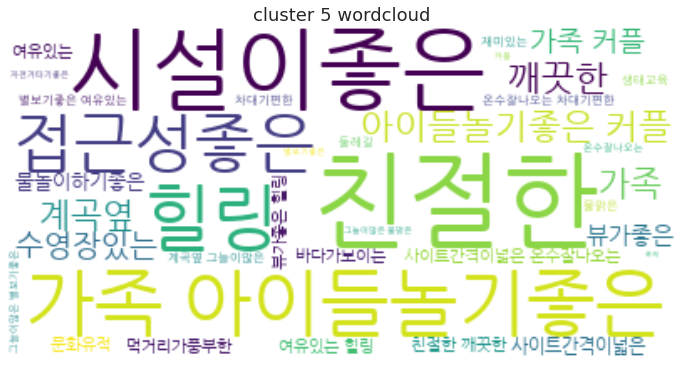

{'친절한': 1.0, '시설이좋은': 0.7380952380952381, '가족 아이들놀기좋은': 0.6666666666666666, '힐링': 0.6349206349206349, '접근성좋은': 0.48412698412698413, '아이들놀기좋은 커플': 0.4523809523809524, '깨끗한': 0.4365079365079365, '가족': 0.3968253968253968, '계곡옆': 0.38095238095238093, '수영장있는': 0.3492063492063492, '가족 커플': 0.3333333333333333, '뷰가좋은': 0.3253968253968254, '물놀이하기좋은': 0.24603174603174602, '사이트간격이넓은': 0.23809523809523808, '친절한 깨끗한': 0.20634920634920634, '먹거리가풍부한': 0.1984126984126984, '문화유적': 0.1984126984126984, '사이트간격이넓은 온수잘나오는': 0.19047619047619047, '여유있는 힐링': 0.18253968253968253, '여유있는': 0.1746031746031746, '바다가보이는': 0.1746031746031746, '뷰가좋은 힐링': 0.16666666666666666, '별보기좋은 여유있는': 0.16666666666666666, '차대기편한': 0.15079365079365079, '둘레길': 0.14285714285714285, '온수잘나오는 차대기편한': 0.1349206349206349, '물맑은': 0.12698412698412698, '생태교육': 0.11904761904761904, '재미있는': 0.11904761904761904, '계곡옆 그늘이많은': 0.11904761904761904, '온수잘나오는': 0.09523809523809523, '그늘이많은 별보기좋은': 0.09523809523809523, '별보기좋은': 0.07142857142857142, '그늘

In [70]:
c_ls = np.unique(tag_cs_df['cluster']).tolist()
for c in c_ls[1:]:
    t_df = tag_cs_df[tag_cs_df['cluster']==c]
    words_bag = ''
    for tags in t_df['tags']:
        words_bag += (' / '+tags)
    wc = WordCloud(font_path='font/NanumGothic.ttf', background_color='white').generate(words_bag)
    plt.figure(figsize=(12, 12))
    plt.title(f"cluster {c} wordcloud")
    plt.imshow(wc, interpolation="bilinear")
    plt.axis('off')
    plt.show()
    print(wc.words_)